# $\min \Delta R_{jj}^{HC1}$ validation

**Goal:** Let's just sanity check some of the 4b distributions w/ these new sorts for $\min dR$

In [1]:
import dask.dataframe as dd
import pyarrow.parquet as pq
import pyarrow as pa

import os
os.sys.path+= ['../RRevolution/code/','../code/']
from analysis import getXhh
from utils import mcToYr

from plotting import SR_x, SR_y1, SR_y2
from plotting import CR_x, CR_y1, CR_y2
from plotting import SB_x, SB_y1, SB_y2

import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot

import matplotlib.pyplot as plt
from matplotlib import gridspec

# Let's do ATLAS style plots too!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

Running w/ conda env: don't import root packages.


../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


**Step 1:** Let's look at the massplanes

In [2]:
len(glob(f'../data/data17-JUN20/files/df_min_dR1_2b_Db_sort_period?_00*.parquet'))

434

In [2]:
prodTag = 'JUN20'

In [4]:
# Load in 2b

dat_2b = dd.read_parquet(f'../data/data17-{prodTag}/files/df_min_dR1_2b_Db_sort_period?_00*.parquet',
                         columns=['X_wt','m_h1','m_h2','bucket','m_hh','abs_deta_hh'])

In [6]:
df_2b = dat_2b.loc[dat_2b.abs_deta_hh < 1.5,['X_wt','m_h1','m_h2','bucket','m_hh']].compute()

In [5]:
# Load in 3b

cols = ['X_wt','m_h1','m_h2','bucket','m_hh','ntag','kinematic_region','j3_Db','MDR','MDpT','abs_deta_hh','pT_4']
cols += ['Db_h1_j1','Db_h1_j2','Db_h2_j1','Db_h2_j2']
df_3b = pd.read_parquet(f'../data/data17-JUN20/df_min_dR1_3b_Db_sort.parquet',columns=cols)

In [10]:
c0 = 'grey'
c1 = 'k'
title = '$\min \Delta R_{jj}^{HC 1}$'

In [6]:
pairing = "$\mathbf{ATLAS}$ Simulation Internal\n"
pairing += f"data17, {prodTag} MNT prod\nDL1r 77% WP"

In [7]:
preXwt = "$\mathbf{ATLAS}$ Simulation Internal\n"
preXwt += f"data17, {prodTag} MNT prod\n"
preXwt += "DL1r 77% WP, $|\Delta \eta_{hh}|$ < 1.5"

In [8]:
fmp = "$\mathbf{ATLAS}$ Simulation Internal\n"
fmp += f"data17, {prodTag} MNT prod\n"
fmp += "DL1r 77% WP, $|\Delta \eta_{hh}|$ < 1.5, $X_{wt}$ > 1.5"

In [10]:
x0, y0 = 120,110
x1,y1 = 125,116


#r_SR = 1.6
#SR_x_new = np.linspace(x1 / (1 + 0.1 * r_SR), x1 / (1 - 0.1 * r_SR))

SR_x_new = np.linspace(x1 / 1.16, x1 / 0.840000000001)

alpha = np.power(10*(SR_x_new - x1)/SR_x_new,2)
SR_y1_new = y1 / (1 + 0.1 * np.sqrt(np.power(1.6,2) - alpha))
SR_y2_new = y1 / (1 - 0.1 * np.sqrt(np.power(1.6,2) - alpha))

# CR_x = np.linspace(124-30,124+30)
# beta = np.sqrt(30**2 - np.power(CR_x-124, 2))
# CR_y1 = 113 + beta
# CR_y2 = 113 - beta

# SB_x = np.linspace(126-45,126+45)
# gamma = np.sqrt(45**2 - np.power(SB_x-126, 2))
# SB_y1 = 116 + gamma
# SB_y2 = 116 - gamma



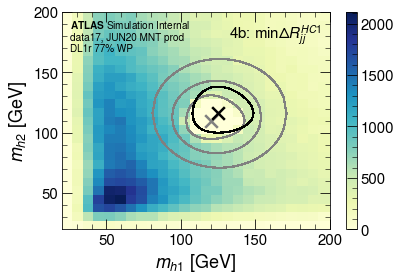

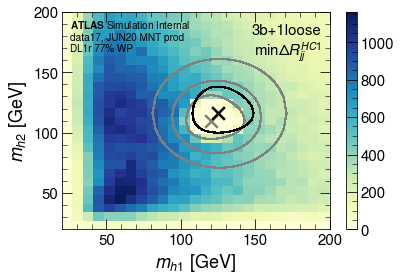

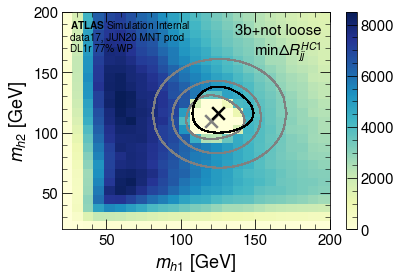

In [12]:
for tag_id, mi in zip(['4b','3b+1loose','3b+not loose'],
                      [df_3b.ntag>=4,(df_3b.ntag==3)&(df_3b.j3_Db==2),(df_3b.ntag==3)&(df_3b.j3_Db==1)]):

    
    plt.figure()

    plt.hist2d(*df_3b.loc[mi & (df_3b.kinematic_region!= 0),['m_h1','m_h2']].values.T,
               25,[(20,200),(20,200)],cmap='YlGnBu')
    
    plt.colorbar()
    plt.xlabel('$m_{h1}$ [GeV]',fontsize=18)
    plt.ylabel('$m_{h2}$ [GeV]',fontsize=18)
    
    ax = plt.gca()
    plt.text(.97,.95,f'{tag_id}: {title}' if tag_id == '4b' else f'{tag_id}\n{title}',
             transform=ax.transAxes,ha='right',va='top',fontsize=15)
    plt.text(0.03,0.97,pairing,transform=ax.transAxes,ha='left',va='top',fontsize=10)
    
    # Overlay our region definitions
    plt.scatter([x0],[y0],160,marker='x',color=c0)
    plt.plot(np.hstack([SR_x,SR_x[::-1]]),np.hstack([SR_y1,SR_y2[::-1]]),color=c0,lw=1.2)
    plt.plot(np.hstack([CR_x,CR_x[::-1]]),np.hstack([CR_y1,CR_y2[::-1]]),color=c0,lw=1.2)
    plt.plot(np.hstack([SB_x,SB_x[::-1]]),np.hstack([SB_y1,SB_y2[::-1]]),color=c0,lw=1.2)
        
    plt.scatter([x1],[y1],160,marker='x',color=c1)    
    plt.plot(np.hstack([SR_x_new,SR_x_new[::-1]]),
             np.hstack([SR_y1_new,SR_y2_new[::-1]]),
             color=c1,lw=1.2)

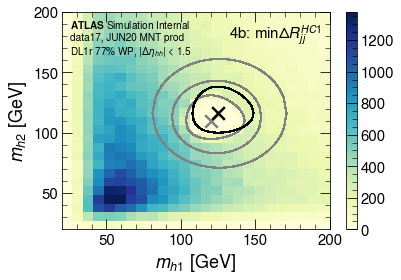

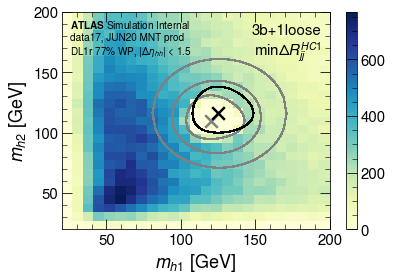

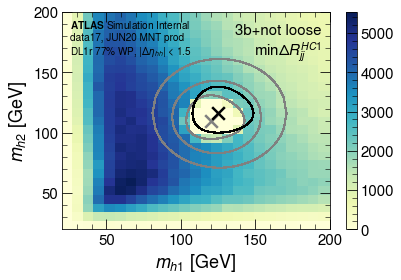

In [13]:
for tag_id, mi in zip(['4b','3b+1loose','3b+not loose'],
                      [df_3b.ntag>=4,(df_3b.ntag==3)&(df_3b.j3_Db==2),(df_3b.ntag==3)&(df_3b.j3_Db==1)]):

    
    plt.figure()

    plt.hist2d(*df_3b.loc[mi & (df_3b.kinematic_region!= 0) & (df_3b.abs_deta_hh < 1.5),['m_h1','m_h2']].values.T,
               25,[(20,200),(20,200)],cmap='YlGnBu')
    
    plt.colorbar()
    plt.xlabel('$m_{h1}$ [GeV]',fontsize=18)
    plt.ylabel('$m_{h2}$ [GeV]',fontsize=18)
    
    ax = plt.gca()
    plt.text(.97,.95,f'{tag_id}: {title}' if tag_id == '4b' else f'{tag_id}\n{title}',
             transform=ax.transAxes,ha='right',va='top',fontsize=15)
    plt.text(0.03,0.97,preXwt,transform=ax.transAxes,ha='left',va='top',fontsize=10)
    
    # Overlay our region definitions
    plt.scatter([x0],[y0],160,marker='x',color=c0)
    plt.plot(np.hstack([SR_x,SR_x[::-1]]),np.hstack([SR_y1,SR_y2[::-1]]),color=c0,lw=1.2)
    plt.plot(np.hstack([CR_x,CR_x[::-1]]),np.hstack([CR_y1,CR_y2[::-1]]),color=c0,lw=1.2)
    plt.plot(np.hstack([SB_x,SB_x[::-1]]),np.hstack([SB_y1,SB_y2[::-1]]),color=c0,lw=1.2)
        
    plt.scatter([x1],[y1],160,marker='x',color=c1)    
    plt.plot(np.hstack([SR_x_new,SR_x_new[::-1]]),
             np.hstack([SR_y1_new,SR_y2_new[::-1]]),
             color=c1,lw=1.2)

**Q:** What's up with the bumps?

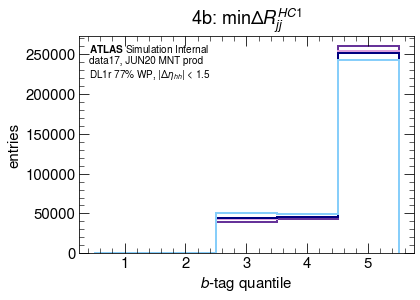

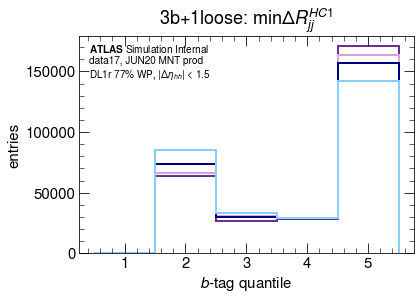

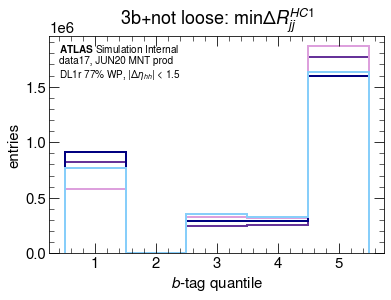

In [14]:
for tag_id, mi in zip(['4b','3b+1loose','3b+not loose'],
                      [df_3b.ntag>=4,(df_3b.ntag==3)&(df_3b.j3_Db==2),(df_3b.ntag==3)&(df_3b.j3_Db==1)]):

    
    plt.figure()

    m = mi & (df_3b.kinematic_region!= 0) & (df_3b.abs_deta_hh < 1.5)

    for col, color in zip(['Db_h1_j1','Db_h1_j2','Db_h2_j1','Db_h2_j2'],
                          ['rebeccapurple','plum','navy','lightskyblue']):

        plt.hist(df_3b.loc[m,col],5,(0.5,5.5),histtype='step',lw=2,label=col,color=color)
    
    plt.xlabel('$b$-tag quantile')
    plt.ylabel('entries')
    
    plt.title(f'{tag_id}: {title}')
    
    ax = plt.gca()
    plt.text(0.03,0.97,preXwt,transform=ax.transAxes,ha='left',va='top',fontsize=10)
    

Message: not-b mostly in the subleading HC (as Sean was saying)

In [24]:
plt.figure()

# 3b + 1 loose
m = (df_3b.ntag==3) & (df_3b.kinematic_region!= 0) & (df_3b.abs_deta_hh < 1.5)

for col, color in zip(['Db_h1_j1','Db_h1_j2','Db_h2_j1','Db_h2_j2'],
                      ['rebeccapurple','plum','navy','lightskyblue']):

    plt.hist(df_3b.loc[m & (df_3b[col]==2),'m_h2'],100,(20,200),
             histtype='step',lw=2,label=f'loose {col}',color=color)

plt.xlabel('$m_{h2}$ [GeV]',fontsize=18)
plt.ylabel('entries',fontsize=18)

plt.title(f'3b + 1 loose: {title}')
plt.legend(loc='lower center',fontsize=11)

ax = plt.gca()
plt.text(0.97,0.97,preXwt,transform=ax.transAxes,ha='right',va='top',fontsize=10)


# 3b 
plt.figure()
for col, color in zip(['Db_h1_j1','Db_h1_j2','Db_h2_j1','Db_h2_j2'],
                      ['rebeccapurple','plum','navy','lightskyblue']):

    plt.hist(df_3b.loc[m & (df_3b[col]==1),'m_h2'],100,(20,200),
             histtype='step',lw=2,label=f'not-b {col}',color=color)

plt.xlabel('$m_{h2}$ [GeV]',fontsize=18)
plt.ylabel('entries',fontsize=18)

plt.title(f'3b not loose: {title}')
plt.legend(loc='lower center',fontsize=11)

ax = plt.gca()
plt.text(0.97,0.97,preXwt,transform=ax.transAxes,ha='right',va='top',fontsize=10)
plt.show()

NameError: name 'df_3b' is not defined

<Figure size 432x288 with 0 Axes>

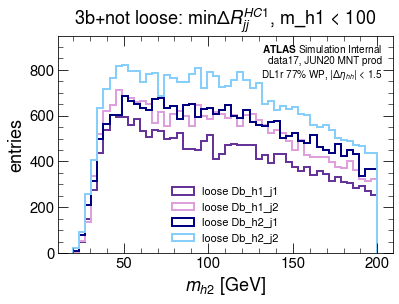

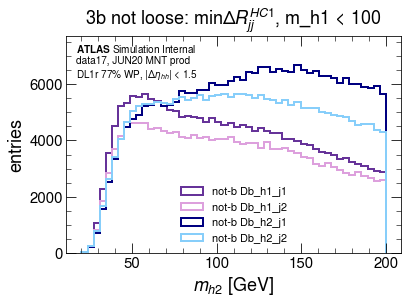

In [25]:
plt.figure()

# 3b + 1 loose
m = (df_3b.ntag==3) & (df_3b.kinematic_region!= 0) & (df_3b.abs_deta_hh < 1.5) & (df_3b.m_h1 < 100)

for col, color in zip(['Db_h1_j1','Db_h1_j2','Db_h2_j1','Db_h2_j2'],
                      ['rebeccapurple','plum','navy','lightskyblue']):

    plt.hist(df_3b.loc[m & (df_3b[col]==2),'m_h2'],50,(20,200),
             histtype='step',lw=2,label=f'loose {col}',color=color)

plt.xlabel('$m_{h2}$ [GeV]',fontsize=18)
plt.ylabel('entries',fontsize=18)

plt.title(f'{tag_id}: {title}, m_h1 < 100')
plt.legend(loc='lower center',fontsize=11)

ax = plt.gca()
plt.text(0.97,0.97,preXwt,transform=ax.transAxes,ha='right',va='top',fontsize=10)

_,ymax = plt.ylim()
plt.ylim(0,1.1*ymax)

# 3b 
plt.figure()
for col, color in zip(['Db_h1_j1','Db_h1_j2','Db_h2_j1','Db_h2_j2'],
                      ['rebeccapurple','plum','navy','lightskyblue']):

    plt.hist(df_3b.loc[m & (df_3b[col]==1),'m_h2'],50,(20,200),
             histtype='step',lw=2,label=f'not-b {col}',color=color)

plt.xlabel('$m_{h2}$ [GeV]',fontsize=18)
plt.ylabel('entries',fontsize=18)

plt.title(f'3b not loose: {title}, m_h1 < 100')
plt.legend(loc='lower center',fontsize=11)

ax = plt.gca()
plt.text(0.03,0.97,preXwt,transform=ax.transAxes,ha='left',va='top',fontsize=10)

_,ymax = plt.ylim()
plt.ylim(0,1.1*ymax)

plt.show()

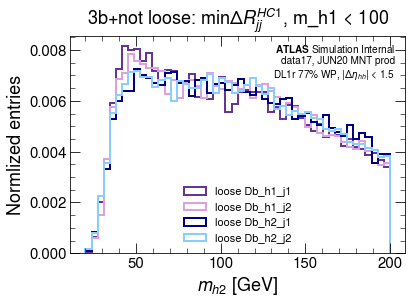

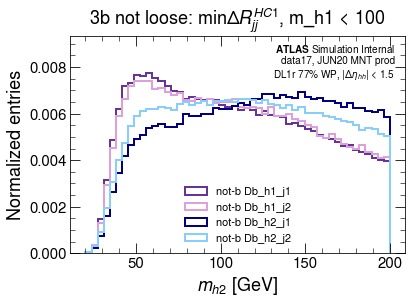

In [17]:
plt.figure()

# 3b + 1 loose
m = (df_3b.ntag==3) & (df_3b.kinematic_region!= 0) & (df_3b.abs_deta_hh < 1.5) & (df_3b.m_h1 < 100)

for col, color in zip(['Db_h1_j1','Db_h1_j2','Db_h2_j1','Db_h2_j2'],
                      ['rebeccapurple','plum','navy','lightskyblue']):

    plt.hist(df_3b.loc[m & (df_3b[col]==2),'m_h2'],50,(20,200),
             histtype='step',lw=2,label=f'loose {col}',color=color,density=True)

plt.xlabel('$m_{h2}$ [GeV]',fontsize=18)
plt.ylabel('Normlized entries',fontsize=18)

plt.title(f'{tag_id}: {title}, m_h1 < 100')
plt.legend(loc='lower center',fontsize=11)

ax = plt.gca()
plt.text(0.97,0.97,preXwt,transform=ax.transAxes,ha='right',va='top',fontsize=10)


# 3b 
plt.figure()
for col, color in zip(['Db_h1_j1','Db_h1_j2','Db_h2_j1','Db_h2_j2'],
                      ['rebeccapurple','plum','navy','lightskyblue']):

    plt.hist(df_3b.loc[m & (df_3b[col]==1),'m_h2'],50,(20,200),
             histtype='step',lw=2,label=f'not-b {col}',color=color,density=True)

plt.xlabel('$m_{h2}$ [GeV]',fontsize=18)
plt.ylabel('Normalized entries',fontsize=18)

plt.title(f'3b not loose: {title}, m_h1 < 100')
plt.legend(loc='lower center',fontsize=11)

ax = plt.gca()
plt.text(0.97,0.97,preXwt,transform=ax.transAxes,ha='right',va='top',fontsize=10)

_,ymax = plt.ylim()
plt.ylim(0,1.15*ymax)

plt.show()

If I put these plots in a talk, I should probably just highlight when the b-tag is in the the lead or subleading jet.

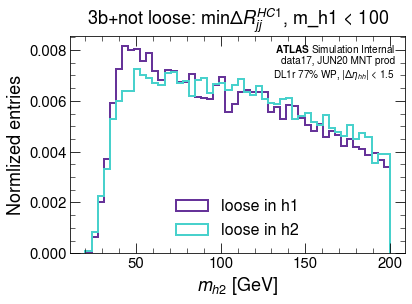

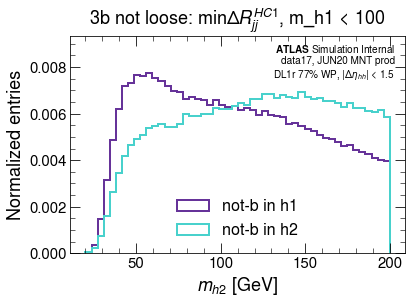

In [18]:
plt.figure()

# 3b + 1 loose
m = (df_3b.kinematic_region!= 0) & (df_3b.abs_deta_hh < 1.5) & (df_3b.m_h1 < 100)

for i, color in zip([1,2],['rebeccapurple','mediumturquoise']):

    plt.hist(df_3b.loc[m & ((df_3b[f'Db_h{i}_j1']==2) | (df_3b[f'Db_h{i}_j1']==2)),'m_h2'],
             50,(20,200),histtype='step',lw=2,label=f'loose in h{i}',color=color,density=True)

plt.xlabel('$m_{h2}$ [GeV]',fontsize=18)
plt.ylabel('Normlized entries',fontsize=18)

plt.title(f'{tag_id}: {title}, m_h1 < 100')
plt.legend(loc='lower center',fontsize=16)

ax = plt.gca()
plt.text(0.97,0.97,preXwt,transform=ax.transAxes,ha='right',va='top',fontsize=10)


# 3b 
plt.figure()
for i, color in zip([1,2],['rebeccapurple','mediumturquoise']):

    plt.hist(df_3b.loc[m & ((df_3b[f'Db_h{i}_j1']==1) | (df_3b[f'Db_h{i}_j1']==1)),'m_h2'],
             50,(20,200),histtype='step',lw=2,label=f'not-b in h{i}',color=color,density=True)

plt.xlabel('$m_{h2}$ [GeV]',fontsize=18)
plt.ylabel('Normalized entries',fontsize=18)

plt.title(f'3b not loose: {title}, m_h1 < 100')
plt.legend(loc='lower center',fontsize=16)

ax = plt.gca()
plt.text(0.97,0.97,preXwt,transform=ax.transAxes,ha='right',va='top',fontsize=10)

_,ymax = plt.ylim()
plt.ylim(0,1.15*ymax)

plt.show()

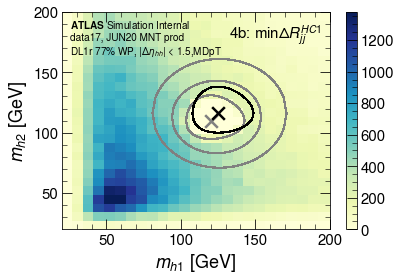

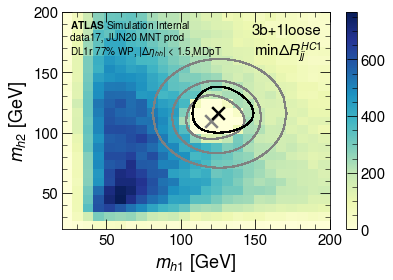

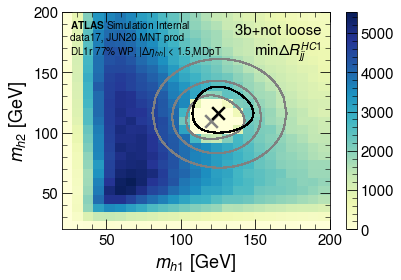

In [19]:
for tag_id, mi in zip(['4b','3b+1loose','3b+not loose'],
                      [df_3b.ntag>=4,(df_3b.ntag==3)&(df_3b.j3_Db==2),(df_3b.ntag==3)&(df_3b.j3_Db==1)]):

    
    plt.figure()

    m = mi & (df_3b.kinematic_region!= 0) & (df_3b.abs_deta_hh < 1.5) & df_3b.MDpT
    plt.hist2d(*df_3b.loc[m,['m_h1','m_h2']].values.T,
               25,[(20,200),(20,200)],cmap='YlGnBu')
    
    plt.colorbar()
    plt.xlabel('$m_{h1}$ [GeV]',fontsize=18)
    plt.ylabel('$m_{h2}$ [GeV]',fontsize=18)
    
    ax = plt.gca()
    plt.text(.97,.95,f'{tag_id}: {title}' if tag_id == '4b' else f'{tag_id}\n{title}',
             transform=ax.transAxes,ha='right',va='top',fontsize=15)
    plt.text(0.03,0.97,preXwt+',MDpT',transform=ax.transAxes,ha='left',va='top',fontsize=10)
    
    # Overlay our region definitions
    plt.scatter([x0],[y0],160,marker='x',color=c0)
    plt.plot(np.hstack([SR_x,SR_x[::-1]]),np.hstack([SR_y1,SR_y2[::-1]]),color=c0,lw=1.2)
    plt.plot(np.hstack([CR_x,CR_x[::-1]]),np.hstack([CR_y1,CR_y2[::-1]]),color=c0,lw=1.2)
    plt.plot(np.hstack([SB_x,SB_x[::-1]]),np.hstack([SB_y1,SB_y2[::-1]]),color=c0,lw=1.2)
        
    plt.scatter([x1],[y1],160,marker='x',color=c1)    
    plt.plot(np.hstack([SR_x_new,SR_x_new[::-1]]),
             np.hstack([SR_y1_new,SR_y2_new[::-1]]),
             color=c1,lw=1.2)

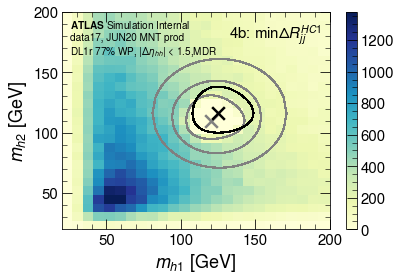

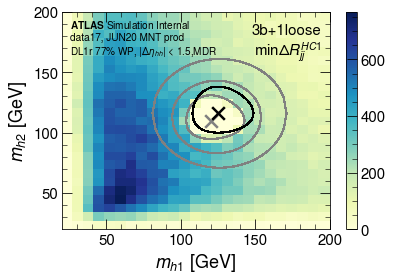

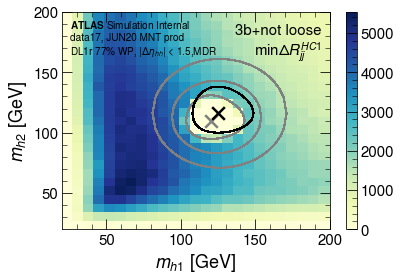

In [20]:
for tag_id, mi in zip(['4b','3b+1loose','3b+not loose'],
                      [df_3b.ntag>=4,(df_3b.ntag==3)&(df_3b.j3_Db==2),(df_3b.ntag==3)&(df_3b.j3_Db==1)]):

    
    plt.figure()

    m = mi & (df_3b.kinematic_region!= 0) & (df_3b.abs_deta_hh < 1.5) & df_3b.MDR
    plt.hist2d(*df_3b.loc[m,['m_h1','m_h2']].values.T,
               25,[(20,200),(20,200)],cmap='YlGnBu')
    
    plt.colorbar()
    plt.xlabel('$m_{h1}$ [GeV]',fontsize=18)
    plt.ylabel('$m_{h2}$ [GeV]',fontsize=18)
    
    ax = plt.gca()
    plt.text(.97,.95,f'{tag_id}: {title}' if tag_id == '4b' else f'{tag_id}\n{title}',
             transform=ax.transAxes,ha='right',va='top',fontsize=15)
    plt.text(0.03,0.97,preXwt+',MDR',transform=ax.transAxes,ha='left',va='top',fontsize=10)
    
    # Overlay our region definitions
    plt.scatter([x0],[y0],160,marker='x',color=c0)
    plt.plot(np.hstack([SR_x,SR_x[::-1]]),np.hstack([SR_y1,SR_y2[::-1]]),color=c0,lw=1.2)
    plt.plot(np.hstack([CR_x,CR_x[::-1]]),np.hstack([CR_y1,CR_y2[::-1]]),color=c0,lw=1.2)
    plt.plot(np.hstack([SB_x,SB_x[::-1]]),np.hstack([SB_y1,SB_y2[::-1]]),color=c0,lw=1.2)
        
    plt.scatter([x1],[y1],160,marker='x',color=c1)    
    plt.plot(np.hstack([SR_x_new,SR_x_new[::-1]]),
             np.hstack([SR_y1_new,SR_y2_new[::-1]]),
             color=c1,lw=1.2)

And next, let's look at some of the 2b plots as well!!

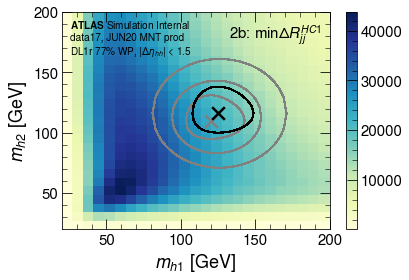

In [13]:
plt.figure()

plt.hist2d(df_2b['m_h1'],df_2b['m_h2'], 25,[(20,200),(20,200)],cmap='YlGnBu')

plt.colorbar()
plt.xlabel('$m_{h1}$ [GeV]',fontsize=18)
plt.ylabel('$m_{h2}$ [GeV]',fontsize=18)

ax = plt.gca()
plt.text(.97,.95,f'2b: {title}',
         transform=ax.transAxes,ha='right',va='top',fontsize=15)
plt.text(0.03,0.97,preXwt,transform=ax.transAxes,ha='left',va='top',fontsize=10)

# Overlay our region definitions
plt.scatter([x0],[y0],160,marker='x',color=c0)
plt.plot(np.hstack([SR_x,SR_x[::-1]]),np.hstack([SR_y1,SR_y2[::-1]]),color=c0,lw=1.2)
plt.plot(np.hstack([CR_x,CR_x[::-1]]),np.hstack([CR_y1,CR_y2[::-1]]),color=c0,lw=1.2)
plt.plot(np.hstack([SB_x,SB_x[::-1]]),np.hstack([SB_y1,SB_y2[::-1]]),color=c0,lw=1.2)

plt.scatter([x1],[y1],160,marker='x',color=c1)    
plt.plot(np.hstack([SR_x_new,SR_x_new[::-1]]),
         np.hstack([SR_y1_new,SR_y2_new[::-1]]),
         color=c1,lw=1.2)
plt.show()

## Next - let's also try to propose some new radii for VR / VR?

**Recall the definitions and their motivation**

Let $(x,y)$ define the SR center, and by default **fix** the SR radius at $r_{SR} = 1.6$ (since as Rafael mentioned, we want to avoid *galvanizing* the SR rn).

Then the VR is defined by 2 parameters: $\delta$ and $r_{VR}$

$$[m_{h1} - x*(1+\delta)]^2 + [m_{h2} - y*(1+\delta)]^2 < r_{VR}^2$$

where for the baselne analysis, $\delta = 0.03$ and $r_{VR}$ = 30 GeV.


And similarly the CR is defined by 2 parameters: $\varepsilon$ and $r_{CR}$

$$[m_{h1} - x*(1+\varepsilon)]^2 + [m_{h2} - y*(1+\varepsilon)]^2 < r_{CR}^2$$

with the baselne setting, $\varepsilon = 0.05$ and $r_{VR}$ = 45 GeV.

**Recall: SR opt for the signal**

In the last iteration of the analysis, we had a center at $(x_0, y_0) = (120, 110)$ GeV, but in the *other notebook* I reoptimized this for $(x_1, y_1) = (125,116)$ GeV.

So, I think I want to **optimize the VR** st it has the same $(m_{h1},m_{h2}) means as the SR, and the radius st the events are roughly compatible?

I think the means being compatible should be something I *do* on 2b and then *check* and *4b* (and then 3b, 3b + 1 loose)


In [14]:
deltas, r_VRs = np.meshgrid(np.linspace(0,.5,11),np.linspace(15,45,7))


In [15]:
mu_x0 = []
mu_y0 = []
for delta, r_VR in tqdm(zip(deltas.flatten(), r_VRs.flatten())):


    VR = np.sqrt((df_2b['m_h1'] - x0 * (1+delta))**2 + (df_2b['m_h2'] - y0 * (1+delta))**2) < r_VR
    VR = VR & (df_2b.kinematic_region != 0)

    mu_x0.append(df_2b.loc[VR,'m_h1'].mean())
    mu_y0.append(df_2b.loc[VR,'m_h2'].mean())
    

77it [01:07,  1.14it/s]


[[ 7.14377922  0.27400747]
 [ 6.09657358  1.26495369]
 [ 5.27492503  2.86875555]
 [ 4.81320802  4.84062295]
 [ 5.28446049  8.44883038]
 [ 7.84714513 13.44720185]
 [        nan 14.1561081 ]]
[[ 2.69074774  3.46852605]
 [ 2.44460668  4.21157372]
 [ 2.32214966  5.0970005 ]
 [ 2.48384286  6.36012512]
 [ 3.46891681  9.13018223]
 [ 8.5370255  14.70489341]
 [        nan 15.8012365 ]]


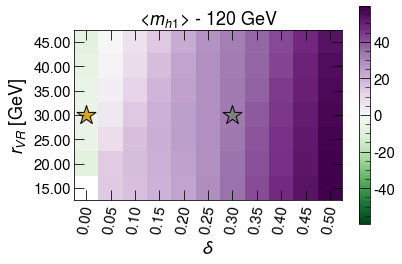

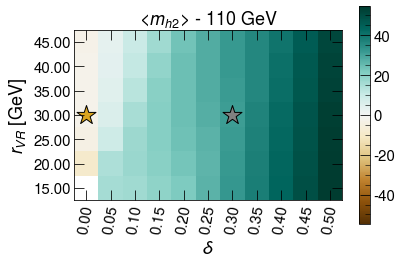

In [37]:
for mus, cmap, mean, var in zip([mu_x0,mu_y0],['PRGn_r','BrBG'],[x0,y0],['$m_{h1}$','$m_{h2}$']):
    
    z = np.array(mus).reshape(7,11) - mean
    
    v = np.max(np.abs(np.nan_to_num(z)))
    
    plt.figure()
    plt.imshow(z, cmap=cmap, vmin=-v, vmax=v, origin='lower')
    plt.colorbar()
    
    plt.xticks(range(11),[f'{d:.2f}' for d in deltas[0]],rotation=80)
    plt.yticks(range(7),[f'{r:.2f}' for r in r_VRs[:,0]])
    
    ax = plt.gca()
    ax.tick_params(which='minor', length=0)
    
    plt.xlabel('$\delta$',fontsize=18)
    plt.ylabel('$r_{VR}$ [GeV]', fontsize=18)
    
    plt.title(f'<{var}> - {mean} GeV')
    
    # Put a star on the plot
    plt.scatter([6],[3],400,color='grey',marker='*',edgecolors='k')
            
    # And *also* put a gold star on the plot for where the optimal point w/ r_VR = 30 GeV
    j = np.argmin(np.abs(z[3]))
    plt.scatter([j],[3],400,color='goldenrod',marker='*',edgecolors='k')
    
    print(np.abs(z[::-1,:2]))
    

Ok - so my take away here is that the edges are kind of non-optimal even for the baseline abalysis? 

**What would have been the optimal point with this SR center?**

(See the gold star)
It seems like this $\delta$ offset *isn't* necessary for this massplane at least.

Below is just a *quick* sanity check that w/ my reshaping and relabelling everything is still making sense.

In [21]:
deltas.flatten().reshape(7,11)[3,6]

0.30000000000000004

In [20]:
r_VRs.flatten().reshape(7,11)[3,6]

30.0

### And now... let's rinse and repeat on the newly proposed SRs!

**Define a new column `X_hh_new`**

In [12]:
df_2b['Xhh'] = getXhh(df_2b.m_h1,df_2b.m_h2,x0,y0)
df_2b['Xhh_new'] = getXhh(df_2b.m_h1,df_2b.m_h2,x1,y1)

In [70]:
# df_3b['Xhh'] = getXhh(df_3b.m_h1,df_3b.m_h2,x0,y0)
# df_3b['Xhh_new'] = getXhh(df_3b.m_h1,df_3b.m_h2,x1,y1)

In [54]:
np.sum(df_2b.Xhh <1.6)#, np.sum(df_2b.kinematic_region==0)

(479694, 479694)

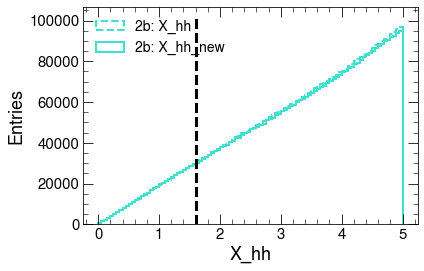

In [60]:
nb = 100
r = (0,5)

plt.hist(df_2b['Xhh'],nb,r,color='turquoise',histtype='step',label='2b: X_hh',lw=2,ls='--')
plt.hist(df_2b['Xhh_new'],nb,r,color='turquoise',histtype='step',label='2b: X_hh_new',lw=2)


ylim = plt.ylim()
plt.plot([1.6]*2,ylim,'k--')

plt.xlabel('X_hh',fontsize=18)
plt.ylabel('Entries',fontsize=18)
plt.legend(loc='upper left')
plt.show()

Ugh... this is imperceptible - does this jive w/ our intuition??

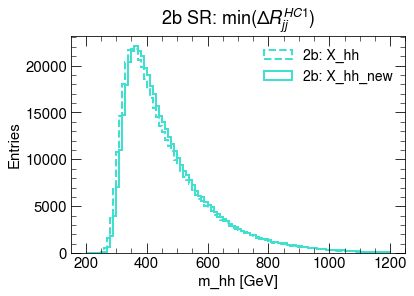

In [66]:
nb,r = 100, (200,1200)

plt.hist(df_2b.loc[df_2b['Xhh']<1.6,'m_hh'],nb,r,color='turquoise',histtype='step',
         label='2b: X_hh',lw=2,ls='--')
plt.hist(df_2b.loc[df_2b['Xhh_new']<1.6,'m_hh'],nb,r,color='turquoise',histtype='step',
         label='2b: X_hh_new',lw=2)


plt.xlabel('m_hh [GeV]')
plt.ylabel('Entries')
plt.legend()
plt.title('2b SR: $\min (\Delta R_{jj}^{HC 1})$')
plt.show()


Hmmmmm - this seems undesirable that the new SR shifts the bkg *higher*, but I believe the ultimate test is if we have better $s / \sqrt{b}$

In [23]:
np.sum(df_2b['Xhh_new']<1.6)/np.sum(df_2b['Xhh']<1.6)

1.111081160320843

With $\min \Delta R_{jj}^{HC 1}$, this shift of the SR ellipse actually *increases* the background contriubion by 10%... this seems undesirable if it persists for 4b as well.

In [71]:
mu_x1 = []
mu_y1 = []

for delta, r_VR in tqdm(zip(deltas.flatten(), r_VRs.flatten())):


    VR = np.sqrt((df_2b['m_h1'] - x1 * (1+delta))**2 + (df_2b['m_h2'] - y1 * (1+delta))**2) < r_VR
    VR = VR & (df_2b.Xhh_new > 1.6)

    mu_x1.append(df_2b.loc[VR,'m_h1'].mean())
    mu_y1.append(df_2b.loc[VR,'m_h2'].mean())
    

77it [01:04,  1.19it/s]


[[ 7.59389499  0.2368196 ]
 [ 6.5261647   1.35565929]
 [ 5.70970875  3.09252142]
 [ 5.32801951  5.34456633]
 [ 6.24999291  9.90932261]
 [ 8.1879743  14.51621798]
 [        nan 14.89088392]]
[[ 3.27303483  3.38127828]
 [ 2.96235489  4.24816528]
 [ 2.81164982  5.2843112 ]
 [ 3.03493858  6.9029754 ]
 [ 4.4555556  10.66590305]
 [ 9.5179233  16.9327841 ]
 [        nan 16.32601795]]


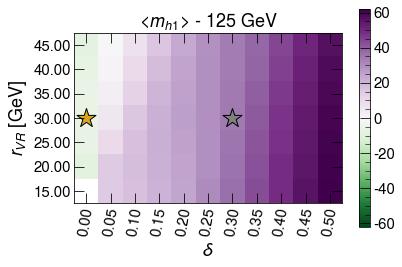

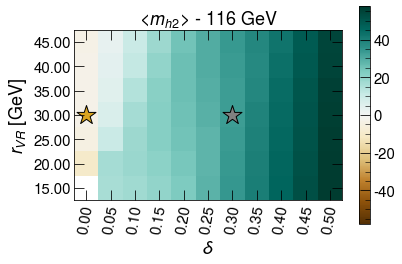

In [74]:
for mus, cmap, mean, var in zip([mu_x1,mu_y1],['PRGn_r','BrBG'],[x1,y1],['$m_{h1}$','$m_{h2}$']):
    
    z = np.array(mus).reshape(7,11) - mean
    
    v = np.max(np.abs(np.nan_to_num(z)))
    
    plt.figure()
    plt.imshow(z, cmap=cmap, vmin=-v, vmax=v, origin='lower')
    plt.colorbar()
    
    plt.xticks(range(11),[f'{d:.2f}' for d in deltas[0]],rotation=80)
    plt.yticks(range(7),[f'{r:.2f}' for r in r_VRs[:,0]])
    
    ax = plt.gca()
    ax.tick_params(which='minor', length=0)
    
    plt.xlabel('$\delta$',fontsize=18)
    plt.ylabel('$r_{VR}$ [GeV]', fontsize=18)
    
    plt.title(f'<{var}> - {mean} GeV')
    
    # Put a star on the plot
    plt.scatter([6],[3],400,color='grey',marker='*',edgecolors='k')
            
    # And *also* put a gold star on the plot for where the optimal point w/ r_VR = 30 GeV
    j = np.argmin(np.abs(z[3]))
    plt.scatter([j],[3],400,color='goldenrod',marker='*',edgecolors='k')
    
    print(np.abs(z[::-1,:2]))
    

Alright - the *same* story played out that we don't need to have this $\delta$ offset.

### Barelling ahead to the CR

Ok, so to incorporate the optimizations from the previous 2 steps, I think it's important to define a *new* variable: `kr_new` incorporting the *new* SR and VR from the opt

In [13]:
df_2b['kr_new'] = 3
df_2b.loc[df_2b.Xhh_new < 1.6,'kr_new'] = 0

VR_new = np.sqrt((df_2b['m_h1'] - x0)**2 + (df_2b['m_h2'] - y0)**2) < 30
df_2b.loc[VR_new & (df_2b.kr_new != 0)] = 1


In [19]:
nu_x1 = []
nu_y1 = []

epsilons, r_CRs = np.meshgrid(np.linspace(0,.1,11),np.linspace(30,60,7))

for eps, r_CR in tqdm(zip(epsilons.flatten(), r_CRs.flatten())):


    CR = np.sqrt((df_2b['m_h1'] - x1 * (1+eps))**2 + (df_2b['m_h2'] - y1 * (1+eps))**2) < r_CR
    CR = CR & (df_2b.kr_new != 0) & (df_2b.kr_new != 1)

    nu_x1.append(df_2b.loc[CR,'m_h1'].mean())
    nu_y1.append(df_2b.loc[CR,'m_h2'].mean())
    

77it [01:15,  1.03it/s]


[[11.18997231  9.61173995]
 [ 9.28565967  7.5586378 ]
 [ 7.1870508   5.19365087]
 [ 4.53453834  2.11512339]
 [ 0.32672947  3.12886419]
 [ 6.53085948  8.63173437]
 [10.73920617 11.86854238]]
[[ 2.82047507  1.35987353]
 [ 1.71827543  0.10630966]
 [ 0.27549882  1.58321367]
 [ 1.88977014  4.16778048]
 [ 6.04560633  9.37611438]
 [13.0512338  14.21669356]
 [15.93053038 16.13121575]]


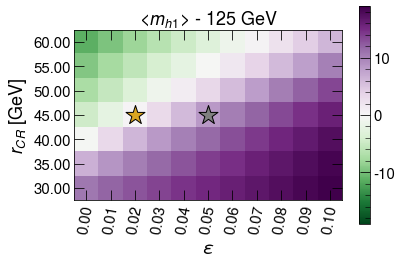

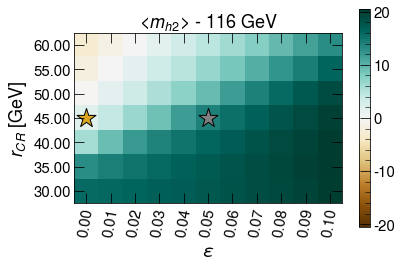

In [22]:
for mus, cmap, mean, var in zip([nu_x1,nu_y1],['PRGn_r','BrBG'],[x1,y1],['$m_{h1}$','$m_{h2}$']):
    
    z = np.array(mus).reshape(7,11) - mean
    
    v = np.max(np.abs(np.nan_to_num(z)))
    
    plt.figure()
    plt.imshow(z, cmap=cmap, vmin=-v, vmax=v, origin='lower')
    plt.colorbar()
    
    plt.xticks(range(11),[f'{d:.2f}' for d in epsilons[0]],rotation=80)
    plt.yticks(range(7),[f'{r:.2f}' for r in r_CRs[:,0]])
    
    ax = plt.gca()
    ax.tick_params(which='minor', length=0)
    
    plt.xlabel(r'$\varepsilon$',fontsize=18)
    plt.ylabel('$r_{CR}$ [GeV]', fontsize=18)
    
    plt.title(f'<{var}> - {mean} GeV')
    
    # Put a star on the plot
    plt.scatter([5],[3],400,color='grey',marker='*',edgecolors='k')
            
    # And *also* put a gold star on the plot for where the optimal point w/ r_VR = 30 GeV
    j = np.argmin(np.abs(z[3]))
    plt.scatter([j],[3],400,color='goldenrod',marker='*',edgecolors='k')
    
    print(np.abs(z[::-1,:2]))
    

Lol - the gold stars are conflicting rn haha. 

For now - let's say this optimization returned $\varepsilon = 0.01$ and $r_{CR} = 45$ GeV.

## Would peeking @ 2b + 2 loose be useful here too??

Honestly - I can't see why not!!

(I'll do this in another nb - I'm running out of memory right here haha)